In [1]:
import pickle
# 从本地文件加载变量
with open("/Users/tian/Downloads/data.pkl", 'rb') as f:
    X_train, X_test, y_train, y_test = pickle.load(f)

In [2]:
import numpy as np
from sklearn.base import clone
from tqdm import tqdm

class BaggingClassifier:
    def __init__(self, base_classifier, n_estimators, random_state=42, sample_size=None):
        self.base_classifier = base_classifier
        self.n_estimators = n_estimators
        self.random_state = random_state
        self.sample_size = sample_size   # 新添加的参数
        self.classifiers = []
        
    def fit(self, X, y):
        np.random.seed(self.random_state)
        n_samples = X.shape[0]
        sample_size = self.sample_size if self.sample_size is not None else n_samples  # 使用指定的sample_size或默认值
        sample_size *= len(y)
        sample_size = int(sample_size)
        y = np.array(y).ravel()
        for _ in tqdm(range(self.n_estimators), desc="Fitting classifiers"):  # 添加进度条
            indices = np.random.choice(n_samples, size=sample_size, replace=True)  # 根据sample_size抽取样本
            X_bootstrapped, y_bootstrapped = X[indices], y[indices]
            # 创建一个新的分类器实例
            classifier = clone(self.base_classifier)
            classifier.fit(X_bootstrapped, y_bootstrapped)
            self.classifiers.append(classifier)
            # print('训练好了一个基分类器')
            
    def predict(self, X):
        predictions = np.zeros((X.shape[0], len(self.classifiers)), dtype=int)
        for i, classifier in enumerate(self.classifiers):
            predictions[:, i] = classifier.predict(X)
        # 使用多数票投票
        return np.apply_along_axis(lambda x: np.bincount(x).argmax(), axis=1, arr=predictions)


In [7]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# 创建Bagging分类器，并使用SVM作为基分类器
svm_classifier = BaggingClassifier(base_classifier=SVC(kernel='rbf', gamma=0.1, class_weight='balanced', C=1), n_estimators=15, sample_size=0.8,random_state=42)

# 训练模型
svm_classifier.fit(X_test, y_test)

# 预测
predictions = svm_classifier.predict(X_test)

训练好了一个基分类器
训练好了一个基分类器
训练好了一个基分类器
训练好了一个基分类器
训练好了一个基分类器
训练好了一个基分类器
训练好了一个基分类器
训练好了一个基分类器
训练好了一个基分类器
训练好了一个基分类器
训练好了一个基分类器
训练好了一个基分类器
训练好了一个基分类器
训练好了一个基分类器
训练好了一个基分类器


Accuracy: 0.8116818181818182
Precision: 0.8261059448023682
Recall: 0.8342001537819244
F1 Score: 0.8282725995648057
Confusion Matrix:
[[  860     3    15    27    64]
 [    6   874    19    48    64]
 [   10     3  1844   151   173]
 [   13    14   163  3743  1018]
 [   62    47   355  1888 10536]]


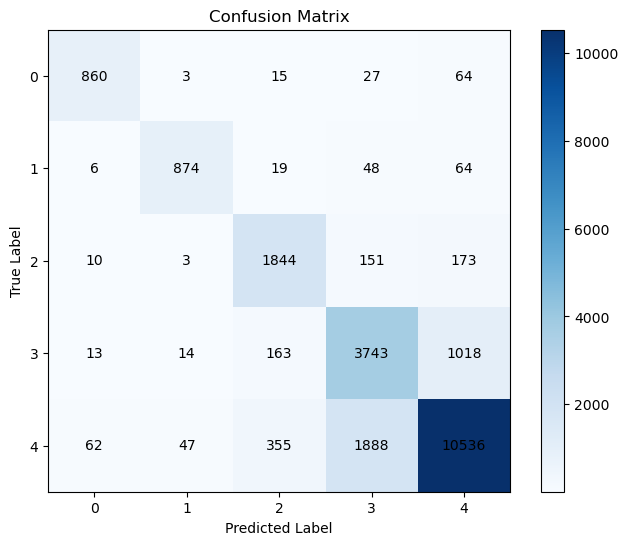

Mean Absolute Error (MAE): 0.24718181818181817
Root Mean Squared Error (RMSE): 0.6426507605223851


In [8]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
# 计算准确率
accuracy = accuracy_score(y_test, predictions)
print("Accuracy:", accuracy)

# 计算精确度
precision = precision_score(y_test, predictions, average='macro') # 'macro' 可以改为其他选项如 'micro', 'weighted', 'samples'
print("Precision:", precision)

# 计算召回率
recall = recall_score(y_test, predictions, average='macro') # 'macro' 可以改为其他选项如 'micro', 'weighted', 'samples'
print("Recall:", recall)

# 计算F1分数
f1 = f1_score(y_test, predictions, average='macro') # 'macro' 可以改为其他选项如 'micro', 'weighted', 'samples'
print("F1 Score:", f1)

# 输出混淆矩阵
conf_matrix = confusion_matrix(y_test, predictions)
print("Confusion Matrix:")
print(conf_matrix)

import matplotlib.pyplot as plt

# 绘制热力图
plt.figure(figsize=(8, 6))
plt.imshow(conf_matrix, interpolation='nearest', cmap='Blues')
plt.title('Confusion Matrix')
plt.colorbar()

# 显示数值
for i in range(len(conf_matrix)):
    for j in range(len(conf_matrix)):
        plt.text(j, i, conf_matrix[i, j], ha='center', va='center', color='black')

# 设置坐标轴标签
plt.xlabel('Predicted Label')
plt.ylabel('True Label')

# 设置坐标轴刻度标签
tick_marks = range(len(conf_matrix))
plt.xticks(tick_marks, tick_marks)
plt.yticks(tick_marks, tick_marks)

plt.show()


from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

# 计算MAE
mae = mean_absolute_error(y_test, predictions)
print("Mean Absolute Error (MAE):", mae)

# 计算RMSE
mse = mean_squared_error(y_test, predictions)
rmse = np.sqrt(mse)
print("Root Mean Squared Error (RMSE):", rmse)


In [3]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# 创建Bagging分类器，并使用SVM作为基分类器
svm_classifier = BaggingClassifier(base_classifier=SVC(kernel='rbf', gamma=0.1, class_weight='balanced', C=1), n_estimators=30, sample_size=0.8,random_state=42)

# 训练模型
svm_classifier.fit(X_test, y_test)

# 预测
predictions = svm_classifier.predict(X_test)

Fitting classifiers: 100%|██████████| 30/30 [1:45:04<00:00, 210.16s/it]


Accuracy: 0.8281363636363637
Precision: 0.8440841495640166
Recall: 0.8710611923344107
F1 Score: 0.8557294776339603
Confusion Matrix:
[[  924     1     5    10    29]
 [    2   936    15    18    40]
 [    5     1  1916   124   135]
 [    8     5   150  3833   955]
 [   56    47   357  1818 10610]]


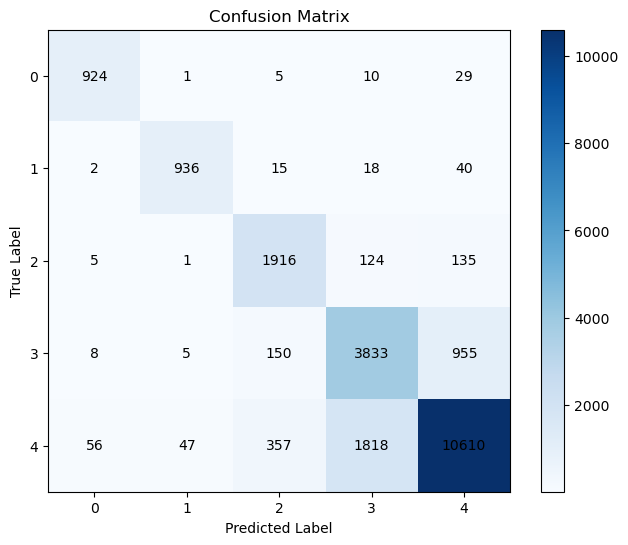

Mean Absolute Error (MAE): 0.21686363636363637
Root Mean Squared Error (RMSE): 0.5827442913413302


In [4]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
# 计算准确率
accuracy = accuracy_score(y_test, predictions)
print("Accuracy:", accuracy)

# 计算精确度
precision = precision_score(y_test, predictions, average='macro') # 'macro' 可以改为其他选项如 'micro', 'weighted', 'samples'
print("Precision:", precision)

# 计算召回率
recall = recall_score(y_test, predictions, average='macro') # 'macro' 可以改为其他选项如 'micro', 'weighted', 'samples'
print("Recall:", recall)

# 计算F1分数
f1 = f1_score(y_test, predictions, average='macro') # 'macro' 可以改为其他选项如 'micro', 'weighted', 'samples'
print("F1 Score:", f1)

# 输出混淆矩阵
conf_matrix = confusion_matrix(y_test, predictions)
print("Confusion Matrix:")
print(conf_matrix)

import matplotlib.pyplot as plt

# 绘制热力图
plt.figure(figsize=(8, 6))
plt.imshow(conf_matrix, interpolation='nearest', cmap='Blues')
plt.title('Confusion Matrix')
plt.colorbar()

# 显示数值
for i in range(len(conf_matrix)):
    for j in range(len(conf_matrix)):
        plt.text(j, i, conf_matrix[i, j], ha='center', va='center', color='black')

# 设置坐标轴标签
plt.xlabel('Predicted Label')
plt.ylabel('True Label')

# 设置坐标轴刻度标签
tick_marks = range(len(conf_matrix))
plt.xticks(tick_marks, tick_marks)
plt.yticks(tick_marks, tick_marks)

plt.show()


from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

# 计算MAE
mae = mean_absolute_error(y_test, predictions)
print("Mean Absolute Error (MAE):", mae)

# 计算RMSE
mse = mean_squared_error(y_test, predictions)
rmse = np.sqrt(mse)
print("Root Mean Squared Error (RMSE):", rmse)
